![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fcallysto-sample-notebooks&branch=master&subPath=notebooks/Math/FlippingCoins.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

<img src="images/iStock-coinflip.jpg" width="500px" />

# Flipping Too Many Coins

## Introduction

A classic statistics experiment is simply counting how many "heads" and "tails" you observe when flipping a coin repeatedly. With a perfectly unbiased coin in a statistically perfect world, one might expect to count an equal number of heads and tails by flipping a coin hundreds of times. However, the world we live in is far from statistically perfect. The real world is plagued with **statistical fluctuations**, meaning that measured data are not always equal to what you would expect. For example, if you were to flip a coin 100 times, it is not inconceivable that you would measure something like 45 heads and 55 tails. The reason for this is most of our statistical expectations represent an upper boundary of probability. In other words, if we were to flip a coin infinitely many times, we would expect exactly half of those trials to be heads, and exactly half of those trials to be tails. Unfortunately (or fortunately depending on if you have hobbies or not), you cannot flip a coin infinitely many times. You can only flip a coin a given amount of times. In mathematical terms, the results of any coin flipping experiment will have a _discrete_ number of heads and a _discrete_ number of tails. Or, you'll have counted heads and tails from a set number of trials. 

This sort of statistical problem where you run a number of trials is easily simulated using Python. However, modeling trials of real world situations subject to statistical fluctuations requires something included in Python known as the **random number generator**. So, before we move on to how we can simulate statistical fluctuations, we introduce random numbers and the random number generator. 

# Random Numbers

First, let's take a look at some of those "random" numbers.

In [1]:
from IPython.display import HTML
import random
%matplotlib inline
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt 
import IPython
from IPython import display 
from ipywidgets import widgets
from ipywidgets import interactive
import warnings
warnings.filterwarnings("ignore")


hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# This is the python module which contains the random
# number generator
import random

# This prints 10 random numbers,
# the "_" is simply an unnamed variable for the loop
for _ in range(10):
    print(random.uniform(0,1))
    

0.5405747304431933
0.12377013192499875
0.7728996568842134
0.7768087786190482
0.7942227169082086
0.18195023130629773
0.7878578404589918
0.7125959950886636
0.5354756167080215
0.31148816959371817


Run the above cell a few times, are the numbers the same? They probably aren't. Is the fact that those numbers aren't the same enough to say they are random? Certainly they appear to be from looking at them. Unfortunately, this is math, meaning we need to understand and define the properties that random number should have in order to determine if the random numbers from Python satisfy these requirements.  

## Properties of Random Numbers

Suppose you have a sequence of $N$ random numbers $\{R\}$ with contents $\{r_1, r_2, ... , r_N\}$ where each element $r_i$ is a random number. What sort of properties should this sequence of numbers have? If this is truly a sequence of random numbers, it _must_ satisfy the following properties, which we will explain in greater detail: 

1. Drawing any $r_i$ is equally probable and independent. 
2. The sequence of random numbers is uniformly distributed. 

"Drawing a value" in this scope means we're picking a number from our sequence of random numbers, but not removing it from the sequence (the sequence remains unchanged, we're simply "observing" the random number). 
Let's look at these two properties in a little more detail. 

### All Values Are Equally Probable and Independent

What this means is that if you were to select (but not remove) a number from your sequence of random numbers $\{r_1, r_2, ... , r_N\}$ at random, the probability of drawing any of those numbers is
\begin{equation}
p(r_i) = \frac{1}{N}
\end{equation}
where $p(r_i)$ is the probability of selecting a number $r_i$. This probability is identical for all numbers within your set. More explicitly:
\begin{equation}
p(r_1) = p(r_2) = ... = p(r_N) = \frac{1}{N}
\end{equation}

The independence property means that the if you draw a number from the set, it does not affect the probability of drawing other numbers, or even itself at a later time. This is because the sequence remains unchanged after you draw (observe) a number. This property leads directly to the second important properties of random numbers, discussed below.

### The Numbers are Uniformly Distributed

This simply means that there is no "trend" within the set of random numbers. If you were to plot the histogram of all your random numbers, they would produce a flat rectangle, or the uniform distribution:
\begin{equation}
P(r)  = \left\{
\begin{matrix}
p & a \leq x \leq b \\
0 & \text{otherwise}
\end{matrix}
\right.
\end{equation}

where $P(r)$ is the probability _distribution_ and $p$ is the probability of drawing any number between $a$ and $b$. It is important to note that this probability $p$ is the **same** probability for all numbers between $a$ and $b$. This function simply defines a horizontal line -- meaning that all values from this distribution are equally probable. 

Alright, so we have some definitions of random numbers, let's test Python's random number generator to see if these "random" numbers satisfy our two requirements. Below is a python widget that you can use to visualize random numbers generated with Python. This widget will draw $N$ random numbers (that you get to define) and bin those values into a histogram. If you're unsure what a histogram is, think of it as a bar graph where the bars are defined by counting how many number land within a specific range or "bin". 

Certianly, the question remains of how exactly we're going to translate the definitions above into something that we can use in order to create such a histogram. Let's break down how we'll acomplish this into steps with the following flowchart

>![alt text](images/coin_chart.png)
>
> A schematic diagram for the process required in order to test if the numbers created by the random number generator are uniformly distributed.

This flowchart explains the process required in order to create the histogram in the widget below. Essentially all we need to do is create those $N$ random numbers, place them in the appropriate bind, and then count the number of entires that each bin has. These counts will define the size of each bar in the histogram. We also note that we have converted these raw counts into a percentage by dividing the counts in each bin, by $N$, the number of random numbers counted.

In [3]:
hide_me


def Random_Histogram(N):
    fig = plt.gcf()
    fig.show()
    fig.canvas.draw()
    plt.style.use('ggplot')
    run = 0
    
    plot_step = 1
    
    random_numbers = []
    
    for i in range(N):
        run += 1 
        r = random.uniform(0,1)
        random_numbers.append(r)
        
        if run >= plot_step or i == N-1:
            # Speed the plot up as we go so we can
            # see the variations at the beginning and cruise
            # through the "boring" stuff. 
           
            plot_step = i/2
            
            plt.gca().cla()
            plt.ylabel('Probability')
            plt.ylim([0,0.2])
            plt.xlim([-0.05,1.05])
            
            # This is simply to scale our boxes from counts to probability
            weights = np.ones_like(random_numbers)/float(len(random_numbers))
            plt.hist(random_numbers,
                     bins=10, 
                     weights=weights, 
                     label="Drawn Numbers",
                     edgecolor='black', linewidth=1.2)
            
            plt.title(" ".join([str(i+1), "Numbers From Set"]))
           
            # Generally it's frowned upon to use 'magic numbers'
            # such as the ones below. However, this is what defines 
            # our expected uniform distribution. The 0.1 limit for y comes 
            # from the fact that we have 10 bins in our histogram 
            # (10 bars in the bar graph). If each bin is equally probable, 
            # then they should each have a probability of 1/(number of bins), 
            # which is 1/10 for us. 
            plt.plot([0,0 ,1,1],[0,.1,.1,0], linewidth = 3, label = "Expected")
            
            plt.legend(loc='center left', bbox_to_anchor=(1, .8))
              
 
            # This helps us get ready for the creation of the new frame
            display.clear_output(wait=True)
            display.display(plt.gcf()) 
            # reset counter for if we want to plot or not
            run = 0
           

            
    display.clear_output(wait=True)
    
N = widgets.IntSlider(value = 100, min=10, max = 75000, description="Size of set")
start = widgets.Button(description = "Draw Numbers")

    
def PlotUniform(b):
    Random_Histogram(N.value)
    IPython.display.display(N, start)

start.on_click(PlotUniform)

# this is to hide the code block if you'd like
HTML('''<script>
    code_show=true; 
    function code_toggle() {
        if (code_show){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
        code_show = !code_show
    } 

    $( document ).ready(code_toggle);
    </script>

    To see the algorithm which creates the histogram, click <a href="javascript:code_toggle()">here</a>.''')


IntSlider(value=13557, description='Size of set', max=75000, min=10)

Button(description='Draw Numbers', style=ButtonStyle())

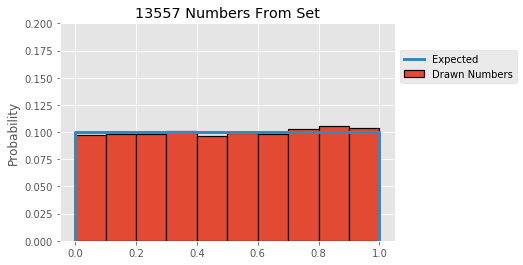

In [4]:
# This cell creates the widget for the histogram
IPython.display.display(N, start)

To use the widget above select the size of the random number set, and click draw numbers. This will animate a histogram which fills with random numbers drawn from the set. The blue line shown in the plot is the "expected" output, a uniform distribution, that the random numbers should follow. 

### Questions
1. Does the histogram of random numbers line up with what you expect after drawing
    - 100 numbers?
    - 1000 numbers?
    - 75000 numbers? 
    - Run those three test cases again, are they identical to the first time you created the histogram?
2. If the numbers you draw don't line up with the expected distribution does that mean our random numbers don't fit the expected curve using a small number of random numbers, does that mean the random number generator isn't behaving correctly? What if it doesn't line up when you include lots of points? 
3. Define statistical variation in your own words and whether or not you see that in the animations above. 
4. Do the numbers returned from the random number generator satisfy our requirements for random numbers? Why or why not?

 

### Relevance to Coin Flipping

The connection between generating random numbers in Python and flipping a coin isn't necessarily obvious. Why do we need to generate random numbers to write a code that simulates flipping coins for us? Well, the answer is we need some metric in order to decide which "coins" are heads, and which are tails. Unfortunately to model a real world situation, we need statistical variation -- we can't just use our expected probabilities to decide the outcome of the coin toss. If we did that we would only be modeling the expected result after an infinite number of trials. 

So, the natural next question is how can we use these random numbers generated by Python in order to simulate something like a coin toss? To explain, it is important to keep the uniform distribution in mind. If you were to flip a fair coin, unbiased for heads or tails, there is a 50 % probability of observing heads, and a 50 % probability of observing tails after any given coin toss. In terms of the uniform distribution and the random number generator, we could make the following plot to describe a coin toss

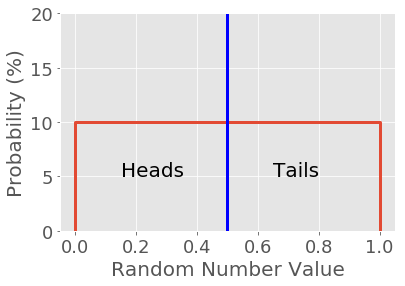

In [5]:
hide_me
plt.style.use('ggplot')
plt.text(0.15, 5,"Heads",size=20)
plt.text(0.65, 5,"Tails", size=20)
plt.ylim([0,20])
plt.ylabel("Probability (%)", size=20)
plt.xlabel("Random Number Value",size=20)
plt.plot([0,0 ,1,1],[0,10,10,0], linewidth = 3, label = "Uniform Distribution")
plt.plot([0.5,0.5], [0,20], linewidth = 3, c='b') 
plt.tick_params(axis='both', which='major', labelsize=18)


plt.show()
HTML('''<script>
    code_show=true; 
    function code_toggle() {
        if (code_show){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
        code_show = !code_show
    } 

    $( document ).ready(code_toggle);
    </script>

    To see the code which created the graph, click <a href="javascript:code_toggle()">here</a>.''')



Let's take a moment to understand this plot. On the $y$ axis we have probability, and on the $x$ axis we have "Random Number Value". What this plot means is that for a given random number between $[0,1]$ (the $x$ value), we simply need to look at which side of the blue line our random number is on. If it's on the left, our simulated coin toss returns heads, and if it's on the right our simulated coin toss returns tails. As all random numbers between zero and one are equally probable, this graph shows that we have a 50 % probability of either heads or tails, modeled well with the random number generator. 

This idea can also be used to model a _biased_ coin, or a coin that favors either heads or tails. For example, suppose we have a coin with a 60 % probability to land with heads facing up. Using the uniform distribution we would have a plot that looks similar to this: 

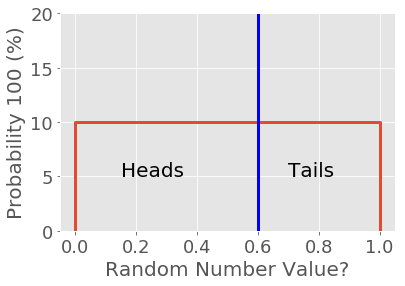

In [6]:
hide_me
plt.style.use('ggplot')

plt.text(0.15, 5,"Heads",size=20)
plt.text(0.70, 5,"Tails", size=20)
plt.ylim([0,20])
plt.ylabel("Probability 100 (%)", size=20)
plt.xlabel("Random Number Value?",size=20)
plt.plot([0,0 ,1,1],[0,10,10,0], linewidth = 3, label = "Uniform Distribution")
plt.plot([0.6,0.6], [0,20], linewidth = 3, c='b') 
plt.tick_params(axis='both', which='major', labelsize=18)


plt.show()

HTML('''<script>
    code_show=true; 
    function code_toggle() {
        if (code_show){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
        code_show = !code_show
    } 

    $( document ).ready(code_toggle);
    </script>

    To see the algorithm which created the graph, click <a href="javascript:code_toggle()">here</a>.''')


Where this plot is functionally identical to the one shown before it, however the probability of our simulated coin returning heads is 60 %, and the probability of our simulated coin returning tails is 40 %. 

Any biased or unbiased coin can be simulated this way and that's exactly what the Python code below does. We have a known probability of returning heads in the range $[0,1]$. We draw a random number $r$, and if that random number is less than the probability of heads we return heads, if it's greater we return tails. This process as a flowchart would appear as follows

>![alt text](images/coin_flip_ex.png)
>
> A potential workflow that would simulate flipping an unbiased coin $N$ times using the random number generator.


Rather than a flow chart, the portion of the above workflow in the green box is written as a simple python function below to demonstrate how straighforward this is to translate into code. hello world!

In [13]:
def HeadsOrTails(prob_heads):
    # draw a random number between 0 and 1
    r = random.uniform(0,1)
    # check if that random number is greater than 
    # the input you provided as prob_heads
    if r > prob_heads:
        return 'tails'
    else:
        return 'heads'
    
HeadsOrTails(0.7)

'heads'

Feel free to run the above code snippet as many times as you like for different coin tosses. Does it behave how you would expect? 

Certainly however, this gets more interesting as we begin flipping the coin many times and counting the results to see if the coin is behaving as we'd expect. Below is a Python code that does exactly that by counting the amount of heads and tails it returns in a loop, and animating the results of all the coin tosses in an interactive widget. While the code below looks more complicated, it is doing exactly the same thing as the snippet above, except now it's counting and plotting. 

In [8]:
hide_me
        
# Create buttons and widgets 
start_button = widgets.Button(description = "Toss those coins")

flips = widgets.IntSlider(value = 100, min=10, max = 100000, description="Trials")
prob = widgets.FloatSlider(value = 0.5, min = 0.0, max = 1.0, description = "Head Probability")
step = widgets.FloatSlider(value = 5, min = 5, max = 100000, description = "Plot step")
                              
# define a coin tossing function

def CoinToss(flips, prob_heads):
    # initialize plot
    fig = plt.gcf()
    fig.show()
    fig.canvas.draw()
    plt.style.use('ggplot')
    
    head_count = 0
    tail_count = 0
    run = 0
    
    # Don't want to animate every flip because it would take too long
    # this way we only have to animate 100 frames, which is nice. 
    plot_step = 0.05 * flips
   
    for i in range(flips):
        # Thhese five lines are identical to the 
        # snippet shown earlier, except now we're counting instead. 
        r = random.uniform(0,1)
        if r > prob_heads:
            tail_count += 1
        else:
            head_count += 1
            
        run += 1  
        # Don't want to plot every frame because it would be
        # way too slow. "buffer" it by only plotting so many 
        # and the last one 
        if run >= plot_step or i == flips-1:  
            
            # This is just for plotting, no actual coin flipping
            # is done in this section. 
            plt.gca().cla() 
        
            plt.ylim([0, flips*max(prob_heads, 1-prob_heads) + flips/4])
            plt.ylabel("Count")
            plt.xticks(np.array([1,2]),["Heads", "Tails"])
            plt.bar([1,2],[head_count, 
                           tail_count],align='center',
                    edgecolor='black', 
                    linewidth=2)
            plt.title(' '.join(["Trial Number: ", str(i+1)]))
            
            # Put counts and percentages abouve the plot as its animated
            plt.text(1-.2, head_count + .01*flips, 
                     str(head_count)+ " (" + str(round(head_count/(i+1)*100,2)) + " %)",
                      fontweight='bold')
            
            plt.text(2-.2, tail_count + .01 * flips, 
                     str(tail_count)+ " (" + str(round(tail_count/(i+1)*100,2)) + " %)",
                      fontweight='bold')
            # This helps us get ready for the creation of the new frame
            display.clear_output(wait=True)
            display.display(plt.gcf()) 
            # reset counter for if we want to plot or not
            run = 0


    display.clear_output(wait=True)

def PlotCase(b):
    CoinToss(flips.value, prob.value)
    IPython.display.display(flips,prob, start_button)



start_button.on_click(PlotCase)
        

HTML('''<script>
    code_show=true; 
    function code_toggle() {
        if (code_show){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
        code_show = !code_show
    } 

    $( document ).ready(code_toggle);
    </script>

    To see the algorithm which simulates flipping coints, click <a href="javascript:code_toggle()">here</a>.''')
    

IntSlider(value=56990, description='Trials', max=100000, min=10)

FloatSlider(value=0.7, description='Head Probability', max=1.0)

Button(description='Toss those coins', style=ButtonStyle())

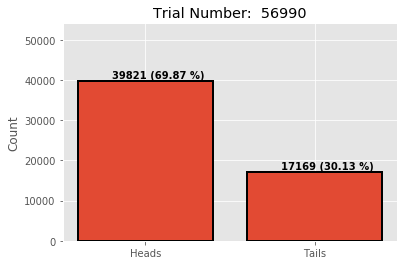

In [9]:
IPython.display.display(flips, prob, start_button)

With the above widget, click the "Toss these coins" button in order to view an animation of many simulated coin tosses. Adjusting the "Trials" slider will change how many times the coins are flipped, and the "Head Prob..." slider changes the probability of the coin flip resulting in heads.

### Questions
1. Simulate flipping an unbiased coin with:
    - 10 trials
    - approximately 100 trials
    - approximately 10000 trials
    - 100000 trials. 
 
 Do you count the number of heads/tails you would expect? Why or why not? If there is a difference between the simulated value and your expected value, is that something to be concerned about? Why or why not?
2. Repeat the above with a biased coin. 


### Conclusion

In this notebook we covered the idea of statistical fluctuations and how we can use the random number generator to model those statistical fluctuations. In doing so, we created a simulation of coin tosses for both fair and biased coins and observed the difference in counting statistics between the two. We learned that while the probability of a fair coin is 50/50, the observed counting statistics may vary slightly from this. This sort of model can be applied to nearly any statistical process, and can act as a primer for the idea of statistical simulations and Monte Carlo methods. 

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)